# はじめに：まずは微分方程式を眺めてみよう
初回で紹介したように、
無料の通信講座として展開している次の講座を Jupyter Notebook 形式にまとめ、編集して再録します。

- [応用からの中高数学再入門 自然を再現しよう 中高数学駆け込み寺](https://phasetr.com/lp/mrrfa1/)
- [プログラミングで数学を 中高数学虎の穴](https://phasetr.com/lp/mpgh1/)

いい復習にもなるので、もしあなたがこの講座をすでに受講していたとしても、ぜひもう一度眺めてみてください。
もちろん、何度も復習したから大丈夫というなら、次の章に進んで問題ありません。

## いろいろな常微分方程式とその近似解法
最初に近似解法と近似解と厳密解の比較をグラフにして簡単にまとめておきます。
特にあなたがこれを「応用からの中高数学再入門 自然を再現しよう」として受講されているなら、
細かいことは気にせず「こんなこともできるのか」と思いながら読み進めてください。
今の段階では式の展開など全体像を見る上での枝葉末節は完全にカットしています。

## 一番簡単な常微分方程式
一番簡単な常微分方程式は $\frac{dx}{dt} = 0$ です。
微分したら 0 になる関数なので $x = \text{定数}$ が解です。
「微分したらこうなる」という条件から、その条件を満たす関数を求めるのが微分方程式でやりたいことです。
中学・高校では二次関数の解のように、関数がある条件をみたすような値を求める問題がメインでした。
微分方程式はある条件を満たす**関数**を求める問題を解くのです。

もう 2 つ挙げておきます。

- $\frac{dx}{dt} = 1$：これをみたす関数は定数 C に対して $x(t) = t + C$。
- $\frac{dx}{dt} = t$：これをみたす関数は同じく定数 C に対して $x(t)= t^2/2  + C$。

これは微分法さえ知っていれば中高生でも簡単に解ける問題で、問題のための問題ともいえます。

そこで実際の自然現象とも結びつく実用的な微分方程式を見てみましょう。

## 1 階の線型常微分方程式
一番単純でしかも実際に使われる微分方程式として、
まずは 1 階の線型常微分方程式を考えます。
すこし不吉な例ですが**放射性物質の崩壊の方程式**を紹介します。
導出をしたければちゃんと物理を勉強する必要があります。
ここでは物理は省略して数学に集中します。

具体的には次の微分方程式を考えます。

\begin{align}
 \frac{dx}{dt} = - c x.
\end{align}

厳密解は $x(t) = C_0 e^{-ct}$ です：上の微分方程式に代入すればわかります。
初期値、例えば $t=0$ での値 $x(0)$ を設定すれば $C_0$ はそこから決まります。

### 解をどう求めるか？
「解はこうだ」とさらっと書きしました。
しかし、もしあなたが初めて微分方程式を見たなら、
これをどうやって解けばいいのか、
解の公式のようなものはあるのか、
いろいろな疑問が出てくるはずです。

ここでは詳しい話はしきれません。
結論だけ書くと、ごく簡単な場合には標準的な解法があってそれで処理できますが、
一般的には具体的に解を求められません。
解があることはわかっても具体的な解が何なのかよくわからない方が普通なのです。
もちろん解がないこともあります。

### 中高での方程式、代数方程式との比較
中高では 2 次方程式では解の公式がありました。
3 次や 4 次の方程式が出てくることもありますが、たいていの場合はちょっと勘を働かせれば解けるように作られています。
さらに、一般の $n$ 次方程式に対して、複素数まで行けば必ず解があることも勉強します。

事情としてはこの最後の例が近いです。
つまり、関数を考える範囲を大きくすれば解があることくらいはわかるかもしれません。
しかし、その解が具体的に何かはわからないことばかりです。
適当に考えた 7 次方程式 $x^7 + 4x^4 + 2x +3 = 0$ の解が何かといわれても困るのと同じです。

微分方程式の場合は解があるかどうかさえ怪しくなります。
これは特に連立 1 次方程式で出会います。

ここでこれ以上細かいことは説明しません。
ただ、一般に正確な解（**厳密解**）が求められなくなることは、微分方程式論のいろいろなところに影を落としています。


### せめて近似解がほしい
たいていの場合、厳密解は求められないと書きました。
実用の状況では必ずしも厳密な答えが欲しいわけではなく、真の解に近い解、近似解で十分なことも多いのです。

精度などいろいろな問題はあります。
ここでは細かいことは気にせず、どうやって近似解を求めるかを考えていきます。
そして近似解をコンピューターによる計算で求めることがこの節の目的です。

### 微分方程式の近似
微分方程式の議論では、近似解を求めるためにふつうは微分方程式自体を近似します。
細かい話はさておき、簡単に状況を眺めてみましょう。
微分法の復習でもあります。

まず微分係数または導関数の**定義に則って** $dx/dt$ を次のように近似します。

\begin{align}
\frac{dx}{dt}
\simeq
\frac{x(t+ \Delta t) - x(t)}{\Delta t}.
\end{align}

この近似を**離散化**と呼ぶことにしましょう。
実際にはいろいろな近似の仕方や離散化手法があります。
ここでは深いことは考えず、導関数を単純に離散化します。
初期時刻を $t=0$ として、$x(n \cdot \Delta t) = x_n$ と書くことにすれば、微分方程式は次のように近似的に離散化して書き直せます。

\begin{align}
 \frac{x_{n+1} - x_{n}}{\Delta t}
 =
 -c x_{n}.
\end{align}

$\Delta t$ は $h$ と書くこともあります。
さらにこれを次のように整理します。

\begin{align}
 x_{n+1}
 =
 x_{n} - c (\Delta t) x_{n}.
\end{align}

これで微分方程式が漸化式になりました。
この漸化式を解くのが離散化による近似解法です。
そして実際にこの漸化式に沿って計算したのがいわゆるオイラー法です。
次のセルではこれを素直にコードに落としています。

### オイラー法のプログラム

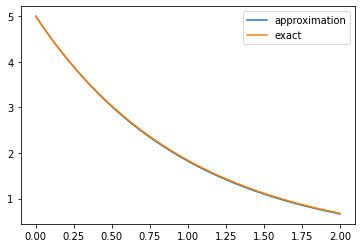

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_euler(nt, init = 10):
    dt = 2 / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    x[0] = init

    for i in range(1, nt):
        x[i] = x[i-1] - c * dt * x[i-1]

    return x

# パラメータ設定
c = 1
nt = 101
init = 5

# 近似解
x1 = radioactive_euler(nt, init)
plt.plot(np.linspace(0, 2, nt), x1)

# 厳密解
t = np.linspace(0, 2, nt)
x2 = init * np.exp(- c * t)
plt.plot(t, x2)

# 凡例
plt.legend(['approximation', 'exact'])
# 描画
plt.show()

### グラフの説明
いまは厳密解が分かっているので厳密解と重ねてグラフを描きました。
2 つの曲線がよく一致している様子が見て取れるでしょう。

もちろん「どのくらい一致しているか」といった事情も本当は詳しく調べなければいけません。
ここではそうした議論はせずに、「コンピューターに計算させることで近似解が求められそうだ」という気分を感じてもらうことをメインに据えて話を進めます。

## 2 階の線型常微分方程式
次に 2 階の常微分方程式として高校の物理で出てくる**ばねの振動（単振動）**を紹介します。
項を増やすと減衰振動になったり、外力をつけたりいろいろなケースがあります。
まずは一番単純な式を考えましょう。

\begin{align}
 \frac{d^2 x}{dt^2}
 =
 - \omega^2 x.
\end{align}

ここでは $v = dx/dt$ という「中間変数」を置いて計算しましょう。
微分方程式を次のように書き直します。

\begin{align}
 \frac{dx}{dt}
 =
 v, \quad
 \frac{dv}{dt}
 =
 - \omega^2 x.
\end{align}

### 単純に考えたときの罠
まずはオイラー法で**単純に**離散化して計算しましょう。

\begin{align}
 x_{n+1}
 =
 x_{n} + h v_{n}, \quad
 v_{n+1}
 =
 v_{n} - h \omega^{2} x_{n}
\end{align}

これをプログラムに落とします。

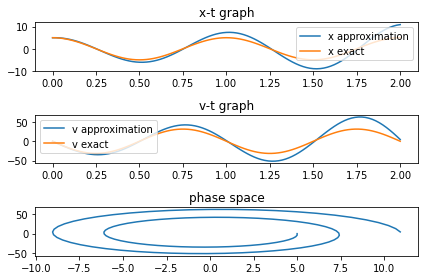

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_euler(nt, init = (5, 0)):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    for i in range(1, nt):
        v[i] = v[i-1] - dt * (omega ** 2) * x[i-1]
        x[i] = x[i-1] + dt * v[i-1]

    return (x, v)

# パラメータ設定
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)

# 近似解
harm = harmonic_euler(nt, init)
t = np.linspace(0, 2, nt)

# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

### 近似が悪い
オレンジが厳密な解で、青が実際に計算した近似解です。
グラフの横軸が時間になっています。

見ての通り時間が進むごとに厳密解と近似解の誤差が大きくなります。
実は `nt` を大きくすると少しはましになります。
実際に上のコードで `nt` を大きくして再計算してみるとわかります。
ぜひ試してみてください。
他にもいくつか問題がありますが物理の話も必要になってくるのでここでは省略します。

ここでは $v = \frac{dx}{dt}$ を導入した上で**素直に**オイラー法で解くと問題が出ることに注目してください。

### 注意：近似・離散化の難しさ
はじめの 1 階化した単振動の方程式をオイラー法で解くと解がめちゃくちゃになる様子を見ました。
しかしこれは離散化の仕方がよくなかったために起きた現象とも言えます。
詳しいことはさておき、修正の仕方を紹介します。

もともと次の方程式を考えていました。

\begin{align}
 \frac{d^2 x}{dt^2}
 =
 - \omega^2 x.
\end{align}

ここで $v = \frac{dx}{dt}$ を導入して次のように書き換えます。

\begin{align}
 \frac{dx}{dt}
 =
 v, \quad
 \frac{dv}{dt}
 =
 - \omega^2 x.
\end{align}

先程はこれを次のように離散化（近似）しました。

\begin{align}
 v_{n+1}
 &=
 v_{n} - h \omega^{2} x_{n}, \\
 x_{n+1}
 &=
 x_{n} + h v_{n}.
\end{align}

実は次のように離散化（近似）するべきなのです。

\begin{align}
 v_{n+1}
 &=
 v_{n} - h \omega^{2} x_{n}, \\
 x_{n+1}
 &=
 x_{n} + h v_{n+1}. \quad (\text{$v_n$ を $v_{n+1}$ にした})
\end{align}

実際にこれで計算してみましょう。


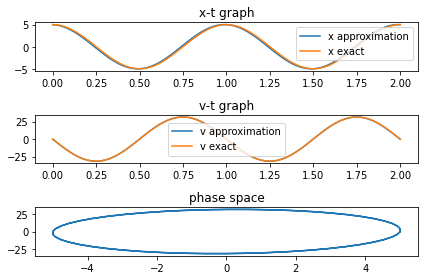

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def harmonic_euler(nt, init = (5, 0)):
    dt = t_range / (nt - 1)
    # 初期条件設定
    x = np.zeros(nt)
    v = np.zeros(nt)
    x[0] = init[0]
    v[0] = init[1]

    for i in range(1, nt):
        v[i] = v[i-1] - dt * (omega ** 2) * x[i-1]
        x[i] = x[i-1] + dt * v[i] # ここを修正

    return (x, v)

# パラメータ設定
omega = 2 * np.pi
nt = 101
t_range = 2
init = (5, 0)

# 近似解
harm = harmonic_euler(nt, init)
t = np.linspace(0, 2, nt)

# 厳密解
x_exact = init[0] * np.cos(- omega * t)
v_exact = - omega * init[0] * np.sin(omega * t)

# グラフ描画
plt.subplot(3, 1, 1)
plt.title('x-t graph')
plt.plot(np.linspace(0, 2, nt), harm[0])
plt.plot(t, x_exact)
plt.legend(['x approximation', 'x exact'])

plt.subplot(3, 1, 2)
plt.title('v-t graph')
plt.plot(np.linspace(0, 2, nt), harm[1])
plt.plot(t, v_exact)
plt.legend(['v approximation', 'v exact'])

plt.subplot(3, 1, 3)
plt.title('phase space')
plt.plot(harm[0], harm[1])

# 描画
plt.tight_layout()

### 結果確認
オイラー法でもかなり精度がよくなったことがわかります。

- **近似計算といっても適当に考えているとろくなことにならない。**

ここではその教訓だけ胸に刻んでおいてください。

## 連立の 1 階常微分方程式：ローレンツ方程式
カオスで有名な方程式です。
連立でしかも非線型なので厳密解は書けません：少なくとも現時点で知られていません。
scipy の関数の紹介もかねて紹介しておきます。

\begin{align}
 \frac{dx}{dt}
 &=
 -px + py, \\
 \frac{dy}{dt}
 &=
 -xz + rx - y, \\
 \frac{dz}{dt}
 &=
 xy - bz.
\end{align}

実は常微分方程式については scipy に一般的なソルバー（関数）があります。
いったんここではそれを使って解いて図示しておきます。
有名な図なのであなたも見たことがあるかもしれません。
ここでは紹介だけに留めます。

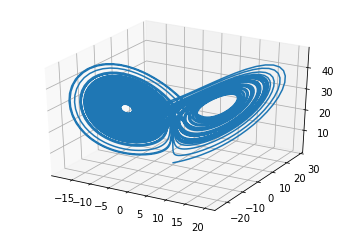

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def func(v, t, p, r, b):
    return [-p*v[0]+p*v[1], -v[0]*v[2]+r*v[0]-v[1], v[0]*v[1]-b*v[2]]

p = 10
r = 28
b = 8/3
v0 = [0.1, 0.1, 0.1]
t = np.arange(0, 100, 0.01)

v = odeint(func, v0, t, args=(p, r, b))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(v[:, 0], v[:, 1], v[:, 2])

## ソルバーと企業活動
世の中の人は必ずしもプログラムが書きたいわけではなく、
自分が解きたいと思った問題を自分が思うように解きたいのです。
そこですでにほかの人が作った一般的な関数やソフトを使うことはよくあります。
ローレンツ方程式を解くのに使った `odeint` もその 1 つです。

偏微分方程式まで含めれば、微分方程式のソルバーはそれだけで何千億のレベルでお金・人が動く世界です。
例えば LS-DYNA というソルバーを開発している会社が 2019 年に約 800 億円で買収されました。

- [構造解析ソフトウェアの開発元を買収、ソリューションを強化](https://monoist.atmarkit.co.jp/mn/articles/1910/16/news009.html)

微分方程式の解の近似計算は世界でこのくらいのお金・人が動く巨大市場ですし、
ソルバー開発はそれだけ大変なことでもあるのです。

既存のソルバーではうまくいかない場合、研究者自身で問題に特化したソルバーを書くこともあります。
これはそのための入門講座でもあります。

# アンケート
毎回アンケートを取っています。
質問や要望がある場合もこちらにどうぞ。

- [アンケートへのリンク](https://goo.gl/forms/hn7bUP4sblqOkBcI3)

アンケートは匿名なので気楽にコメントしてください。
直接返事してほしいことがあれば、
メールなど適当な手段で連絡してください。